In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import numpy as np
from configs import *
import matplotlib.pyplot as plt
import cv2
import sys
from scipy.ndimage import gaussian_filter as blur
import math

In [3]:
meshDir = '_meshes'
procDir = '_procd'

In [4]:
from utils import *

parsev('# asdf 1 2 3 4')

([1.0, 2.0, 3.0, 4.0], 'asdf')

In [5]:
mname = '_meshes/07147-100250_strip_o64_s20_253.obj'
verts, faces, regs = load_markup(mname)
writeobj('dump.obj', verts, faces)

In [6]:
what = [
        dict(
            name='Head',
            match=[(766, range(0, 220)), (326, range(171, 187))],
        ),
        dict(
            name='Neck',
            match=[(766, [612, 625]), (306, [152, 165])]
        ),
        dict(
            name='R_Shoulder',
            match=[(766, [722, 717]), (306, [257, 288])]
        ),
        dict(
            name='R_Elbow',
            match=[(666, range(90, 104)), (704, [114, 130])],
        ),
        dict(
            name='R_Hand',
            match=[(666, range(260, 301)), (704, [250, 260, 313])],
        ),
        dict(
            name='L_Shoulder',
            match=[(766, [692, 659]), (306, [199, 232])]
        ),
        dict(
            name='L_Elbow',
            match=[(704, [21, 29]), (666, range(30, 50))],
        ),
        dict(
            name='L_Hand',
            match=[(666, range(154, 184)), (704, [151, 152, 206])],
        ),
        dict(
            name='R_Hip',
            match=[(666, [654, 646]), (704, [654, 646])],
        ),
        dict(
            name='R_Knee',
            match=[(666, range(375, 382)), (704, [380, 449])],
        ),
        dict(
            name='R_Ankle',
            match=[],
        ),
        dict(
            name='L_Hip',
            match=[(666, [515, 567]), (704, [514, 540])],
        ),
        dict(
            name='L_Knee',
            match=[(666, range(575, 581)), (704, [458, 548])],
        ),
        dict(
            name='L_Ankle',
            match=[],
        ),
    ]

In [7]:
from configs import *
from utils import *

# print(CocoPairsRender)
markupfiles = sorted(glob('_meshes/*.obj'))
framefiles = sorted(
    glob('_captures/*.jpg'), 
    key=lambda ent: int(ent.split(sep)[1][6:-4]))
# print(framefiles[:10])
# print('Active meshes:', active_meshes)

# for ii, fname in enumerate(framefiles):

#     print()
#     print(kpts)

In [13]:
fname = framefiles[35]
fhash = fname.split(sep)[-1][:-4]
# status = '[%d/%d : %s]' % (ii+1, len(framefiles), fhash)
status = '[%d/%d : %s]' % (1, len(framefiles), fhash)
kpts, fmesh, tlist = find_keypoints(status, fhash, markupfiles, what)

In [14]:
print('Joints detected:', len(kpts))

Joints detected: 48


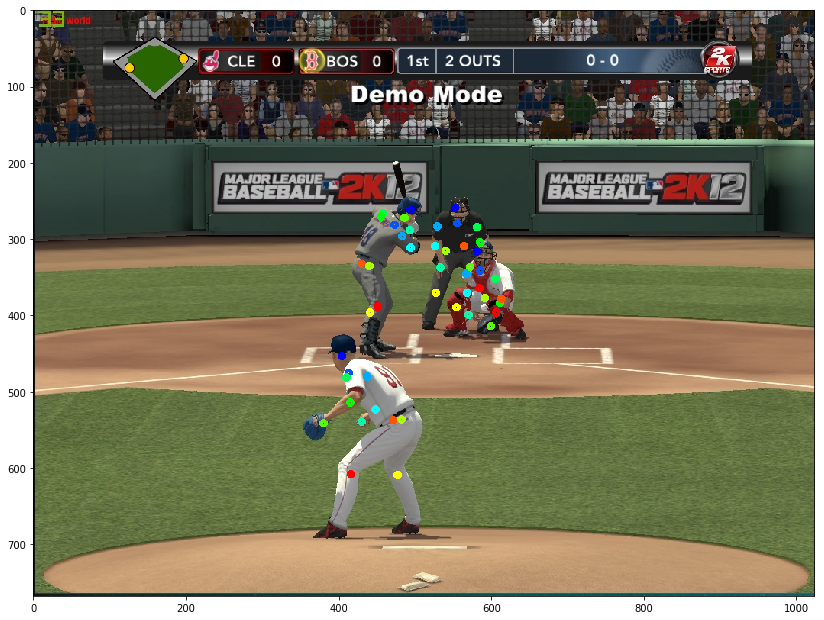

In [11]:
img = draw_skeletons(fhash, kpts)
plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()
# break

In [12]:
writeobj('_outputs/project.obj', fmesh.verts, fmesh.faces, component='project')
writeobj('_outputs/world.obj', fmesh.verts, fmesh.faces)

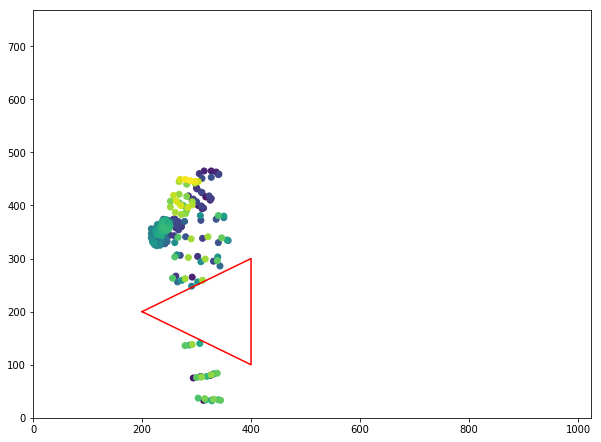

In [87]:
from utils import *

imsize = (768, 1024)

masktri = [[200, 400, 400], [200, 300, 100]]
testtri = [np.array(ent) for ent in zip(*masktri)], [2.0] * 3


pnts = []
zcomp = []
for vert in fmesh.verts[:250]:
    xx, yy, zz, _ = vert['project']
    sy = cpos(imsize[0], yy)
    sx = cpos(imsize[1], xx)
    
    if PointInTriangle(np.array([sx, sy]), *testtri[0]):
        continue
    
    pnts.append((sx, sy))
    zcomp.append(zz)

# print(max(zcomp), min(zcomp))
zcomp = np.array(zcomp)
zcomp -= min(zcomp)
zcomp /= max(zcomp)
xlist, ylist = zip(*pnts)

zind = np.argsort(zcomp)
xlist = [xlist[ind] for ind in zind]
ylist = [ylist[ind] for ind in zind]
zcomp = np.sort(zcomp)

plt.figure(figsize=(10, 10 * imsize[0]/imsize[1]))
plt.scatter(xlist, ylist, c=255 * zcomp)
plt.plot(masktri[0] + [masktri[0][0]], masktri[1] + [masktri[1][0]], c='red')
plt.xlim(0, imsize[1])
plt.ylim(0, imsize[0])
plt.show();plt.close()